In [402]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from string import punctuation
import re
from utils import *

In [403]:
df_bernardo = pd.read_csv('data/bernardoArevalo.csv')
df_sandra = pd.read_csv('data/sandraTorres.csv')

In [404]:
# Limpieza de datos

df_bernardo = df_bernardo.drop(df_bernardo.columns[0], axis=1)	# Primera columna no es necesaria
df_bernardo = df_bernardo.apply(lambda x: x.astype(str).str.lower())	# convertir todo a minúscula
df_bernardo = df_bernardo.drop(['id'], axis=1)
df_bernardo = df_bernardo.drop(['id_str'], axis=1)
df_bernardo = df_bernardo.drop(['url'], axis=1)

# Eliminar signos de puntuacion
df_bernardo['rawContent'] = df_bernardo['rawContent'].apply(lambda x: ''.join([i for i in x if i not in punctuation]))

# Eliminar @
df_bernardo['rawContent'] = df_bernardo['rawContent'].str.replace('@', '')
df_bernardo['rawContent'] = df_bernardo['rawContent'].str.replace('#', '')

# Eliminar emoji
df_bernardo['rawContent'] = df_bernardo['rawContent'].apply(lambda x: emoji_pattern.sub(r'', x))
df_bernardo['rawContent'] = df_bernardo['rawContent'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

df_bernardo = df_bernardo[df_bernardo['lang'] == 'es']

match = lambda user_str: re.search(r"'username':\s*'([^']+)'", user_str)
username_from_str = lambda user_str: match(user_str).group(1) if match(user_str) else None
df_bernardo['tweet_username'] = df_bernardo['user'].apply(username_from_str)



In [405]:

# Limpieza de datos

df_sandra = df_sandra.drop(df_sandra.columns[0], axis=1)	# Primera columna no es necesaria
df_sandra = df_sandra.apply(lambda x: x.astype(str).str.lower())	# convertir todo a minúscula
if 'id' in df_sandra.columns:
    df_sandra = df_sandra.drop(['id'], axis=1)
if 'id_str' in df_sandra.columns:
    df_sandra = df_sandra.drop(['id_str'], axis=1)
df_sandra = df_sandra.drop(['url'], axis=1)

# Eliminar signos de puntuacion
df_sandra['rawContent'] = df_sandra['rawContent'].apply(lambda x: ''.join([i for i in x if i not in punctuation]))

# Eliminar @
df_sandra['rawContent'] = df_sandra['rawContent'].str.replace('@', '')
df_sandra['rawContent'] = df_sandra['rawContent'].str.replace('#', '')

# Eliminar emoji
df_sandra['rawContent'] = df_sandra['rawContent'].apply(lambda x: emoji_pattern.sub(r'', x))
df_sandra['rawContent'] = df_sandra['rawContent'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

df_sandra = df_sandra[df_sandra['lang'] == 'es']
df_sandra['tweet_username'] = df_sandra['user'].apply(username_from_str)



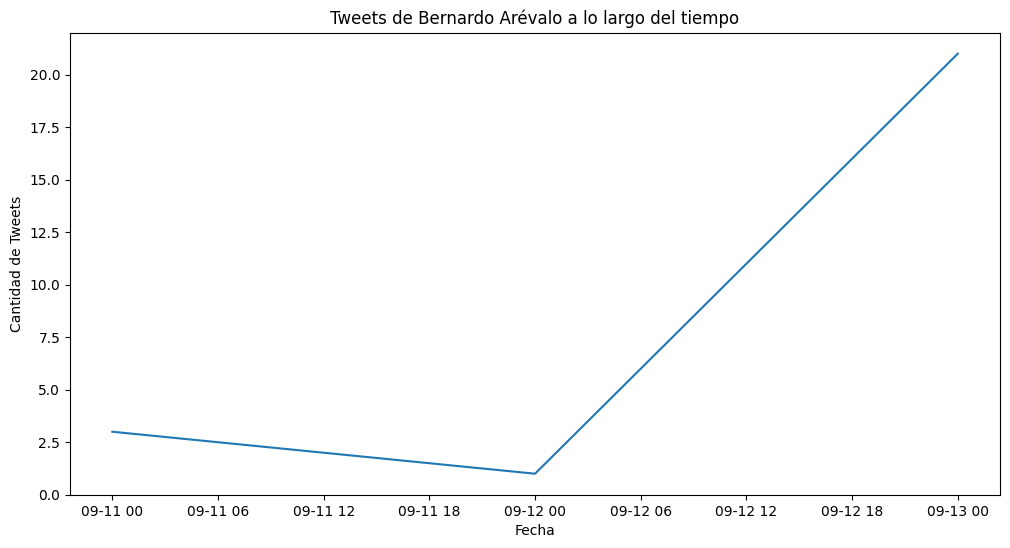

In [409]:
df_bernardo_tc = df_bernardo[df_bernardo['tweet_username'] == 'barevalodeleon'].copy()

df_bernardo_tc['date_only'] = pd.to_datetime(df_bernardo_tc['date']).dt.date
tweets_by_date = df_bernardo_tc.groupby('date_only').size()

# Plot
plt.figure(figsize=(12, 6))
tweets_by_date.plot()
plt.title("Tweets de Bernardo Arévalo a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de Tweets")
plt.show()


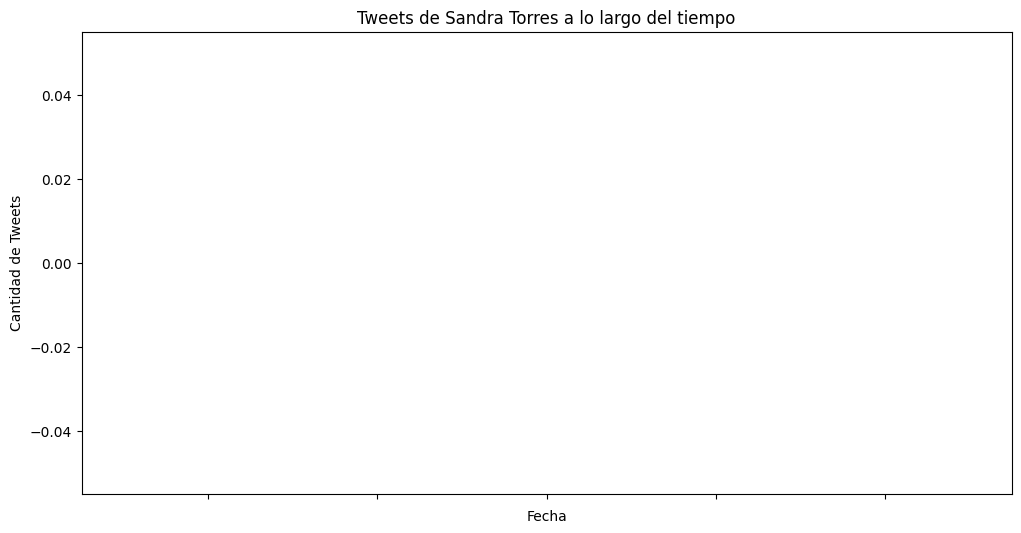

In [411]:
df_sandra_tc = df_sandra[df_sandra['tweet_username'] == 'sandratorresgua'].copy()

df_sandra_tc['date_only'] = pd.to_datetime(df_sandra_tc['date']).dt.date
tweets_by_date = df_sandra_tc.groupby('date_only').size()

plt.figure(figsize=(12, 6))
tweets_by_date.plot()
plt.title("Tweets de Sandra Torres a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de Tweets")

plt.show()


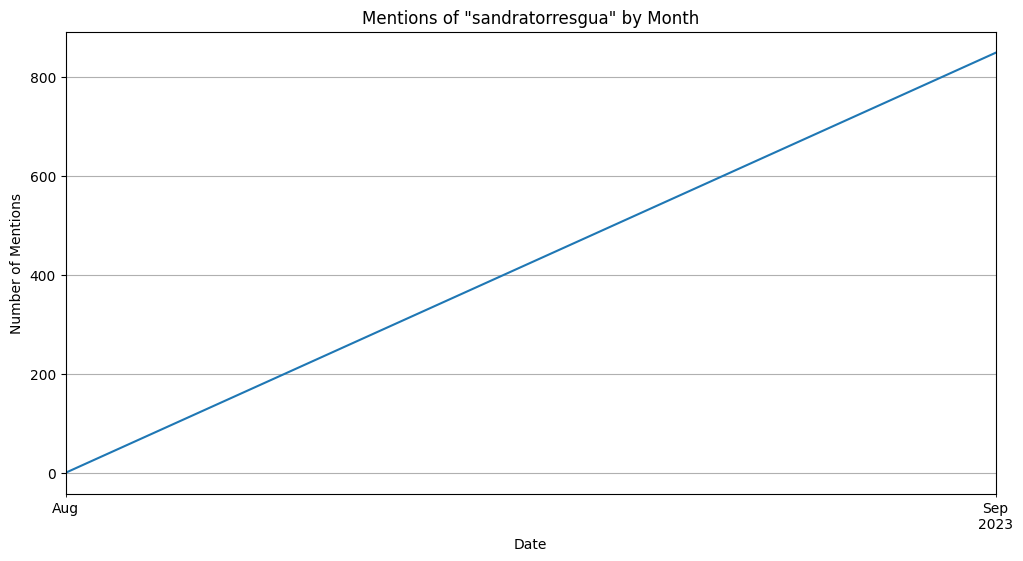

In [415]:
sandra_mentions_subset = df_sandra[df_sandra['mentionedUsers'].str.contains('sandratorresgua', na=False)]

monthly_mentions_sandra = sandra_mentions_subset.resample('M', on='date').size()

plt.figure(figsize=(12, 6))
monthly_mentions_sandra.plot()
plt.title('Mentions of "sandratorresgua" by Month')
plt.xlabel('Date')
plt.ylabel('Number of Mentions')
plt.grid(True)
plt.show()


/Users/saramariapaguagagonzales/.pyenv/versions/3.11.3/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:1399: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


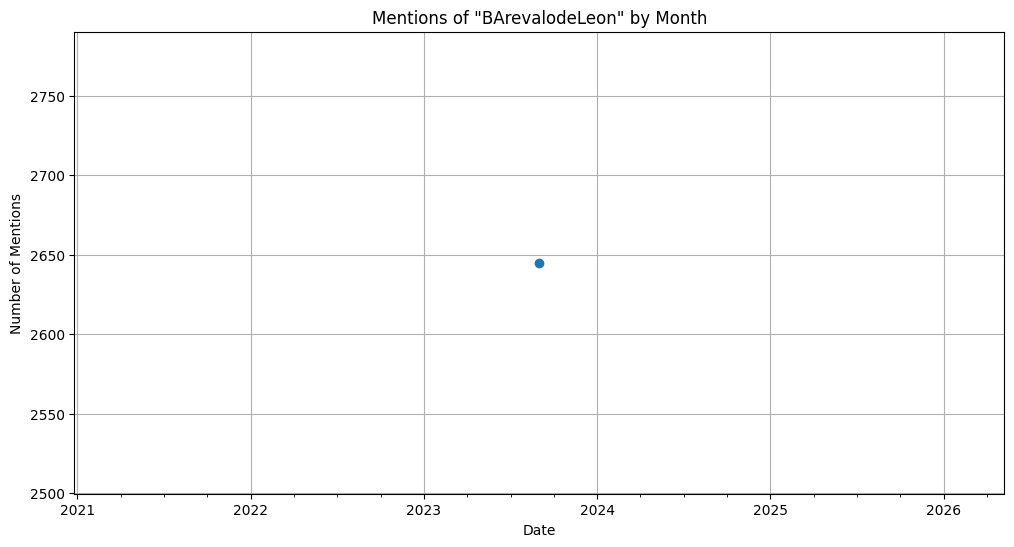

In [418]:
df_bernardo['date'] = pd.to_datetime(df_bernardo['date'])

bernardo_mentions_subset = df_bernardo[df_bernardo['mentionedUsers'].str.contains('barevalodeleon', na=False, case=False)]

monthly_mentions_bernardo = bernardo_mentions_subset.resample('M', on='date').size()

plt.figure(figsize=(12, 6))
monthly_mentions_bernardo.plot(marker='o', linestyle='-')
plt.title('Mentions of "BArevalodeLeon" by Month')
plt.xlabel('Date')
plt.ylabel('Number of Mentions')
plt.grid(True)
plt.show()
